In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd, numpy as np, os, sys
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'size'   : 18}
matplotlib.rc('font', **font)

def plotHorizontalBars(series, xlabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.barh(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='x')
    plt.yticks(xpos, series.index)
    plt.xlabel(xlabel)
    plt.title(title)

def plotVerticalBars(series, ylabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.bar(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='y')
    plt.xticks(xpos, series.index)
    plt.ylabel(ylabel)
    plt.title(title)

In [6]:
start_date = dt.datetime(2020, 3, 7)
daily_cases = [351, 517, 671, 931, 1240, 1690, 2226, 2943, 3738, 4669, 6427, 9351, 13611, 19700, 26800,
               35120, 46100, 55100, 69150, 86000]
dates=[]
for i in range(len(daily_cases)):
    dates.append(start_date + dt.timedelta(days=i))
daily_cases = list(zip(dates, daily_cases))
daily_cases_df = pd.DataFrame(daily_cases, columns=['date', 'cases'])
daily_cases_df['log_cases'] = np.log(daily_cases_df.cases)
daily_cases_df['date_index'] = daily_cases_df.index
daily_cases_df.date_index += 1
display(daily_cases_df)

,date,cases,log_cases,date_index
0,2020-03-07,351,5.860786,1
1,2020-03-08,517,6.248043,2
2,2020-03-09,671,6.508769,3
3,2020-03-10,931,6.836259,4
4,2020-03-11,1240,7.122867,5
5,2020-03-12,1690,7.432484,6
6,2020-03-13,2226,7.707962,7
7,2020-03-14,2943,7.987185,8
8,2020-03-15,3738,8.226306,9
9,2020-03-16,4669,8.448700,10


Coefficients: [[ 0.          0.23808635  0.00757049 -0.00026163]]
Intercept: [5.71672709]


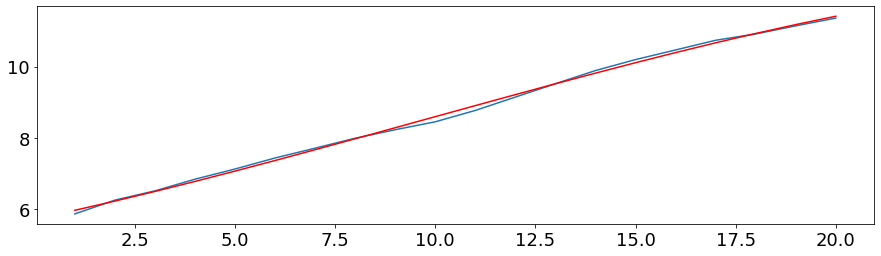

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

x = daily_cases_df.date_index.values.reshape(-1, 1)
poly = PolynomialFeatures(degree=3)
xp = poly.fit_transform(x)

y = daily_cases_df.log_cases.values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(xp, y)
y_fit = reg.predict(xp)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

plt.figure(figsize=(15, 4))
plt.plot(x, y)
plt.plot(x, y_fit, color='red')
plt.show()

In [35]:
x_fut = x.copy()
x_fut -= x.min()
x_fut += x.max()
xp_fut = poly.fit_transform(x_fut)
y_fut = reg.predict(xp_fut)

print(y_fut)
y_fut = np.exp(y_fut).astype(int)

x_fut = np.apply_along_axis(lambda x: (start_date+dt.timedelta(days=int(x))).strftime('%Y-%m-%d'),
                            arr=x_fut, axis=1)
mat = np.c_[x_fut, y_fut]
print(mat)

[[11.41362159]
 [11.63218442]
 [11.83292303]
 [12.01426765]
 [12.17464851]
 [12.31249584]
 [12.42623987]
 [12.51431083]
 [12.57513894]
 [12.60715444]
 [12.60878755]
 [12.5784685 ]
 [12.51462752]
 [12.41569484]
 [12.28010069]
 [12.1062753 ]
 [11.89264889]
 [11.63765169]
 [11.33971394]
 [10.99726586]]
[['2020-03-27' '90546']
 ['2020-03-28' '112666']
 ['2020-03-29' '137712']
 ['2020-03-30' '165093']
 ['2020-03-31' '193812']
 ['2020-04-01' '222458']
 ['2020-04-02' '249257']
 ['2020-04-03' '272205']
 ['2020-04-04' '289276']
 ['2020-04-05' '298687']
 ['2020-04-06' '299176']
 ['2020-04-07' '290241']
 ['2020-04-08' '272291']
 ['2020-04-09' '246642']
 ['2020-04-10' '215367']
 ['2020-04-11' '181004']
 ['2020-04-12' '146188']
 ['2020-04-13' '113283']
 ['2020-04-14' '84095']
 ['2020-04-15' '59710']]
